In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

Matplotlib is building the font cache; this may take a moment.


#### Import the data and get a high-level picture

In [5]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [13]:
df['ordered_at'] = df['ordered_at'].astype('datetime64[ns]')

In [21]:
df['price'] = df['price'].str.replace('$','').astype('float64')
df['line_total'] = df['line_total'].str.replace('$','').astype('float64')

In [23]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [31]:
df[df.duplicated()].shape[0]

0

In [25]:
df = df.dropna()
df = df.drop_duplicates()

In [27]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [29]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [64]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [50]:
df[df['line_total'] < 0].shape[0]

0

#### TODO: 
Set line_total = price * quantity if different.

Then remove if line total < 0

In [54]:
import numpy as np
df['line_total']=np.where(df['line_total']!=df['price']*df['quantity'], df['price']*df['quantity'], df['line_total'])

In [62]:
df['line_total']=np.where(df['line_total']<0, np.nan, df['line_total'])
df=df.dropna()

In [66]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,27624.000000,27624,27624.000000,27624.000000,27624.000000
mean,14993.783051,2018-04-15 11:40:51.128764928,2.511711,2.000724,5.028743
min,10000.000000,2018-01-01 11:30:00,0.500000,1.000000,0.500000
25%,12501.750000,2018-02-23 05:11:56.249999872,1.500000,1.000000,2.500000
50%,14973.000000,2018-04-14 15:11:43,2.500000,2.000000,4.500000
75%,17507.000000,2018-06-07 00:48:22,3.500000,3.000000,7.500000
max,19999.000000,2018-07-28 18:51:57,4.000000,3.000000,12.000000
std,2888.516649,NaN,1.059244,0.819432,3.085410


#### TODO: Get value between "" in name and put it in category column

In [70]:
import re
df['category'] = df['name'].apply(lambda x: re.findall(r'"(.*?)"', x))
df['name'] = df['name'].apply(lambda x: re.sub(r'"(.*?)"', '', x))

In [72]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,[ICE CREAM]
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,[ICE CREAM]
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,[SORBET]
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,[CONE]
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,[SORBET]


#### Analysis, finally!

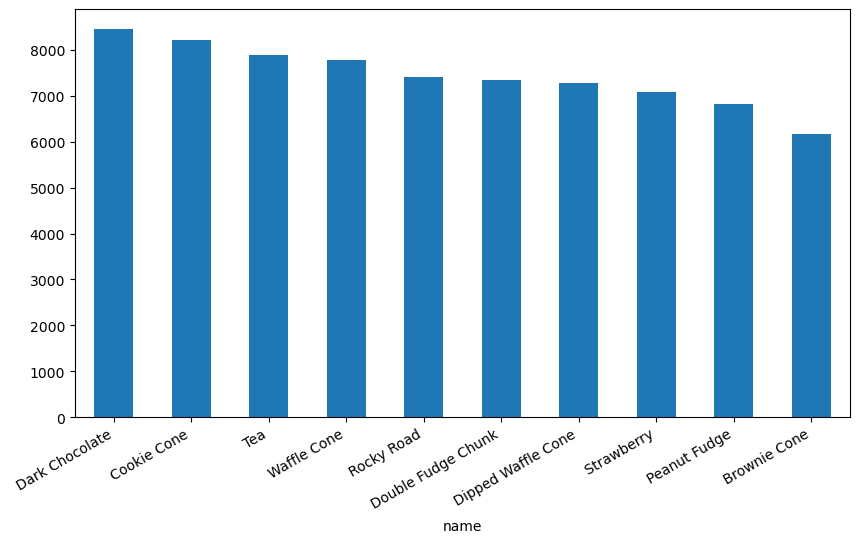

In [74]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()